## Geometric and intensity transformations

/var/folders/kj/bb_v10011nbcmpjq25wt_n5r0000gn/T/ipykernel_47432/598176027.py:11: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  f = misc.ascent()  # retrieve a grayscale image


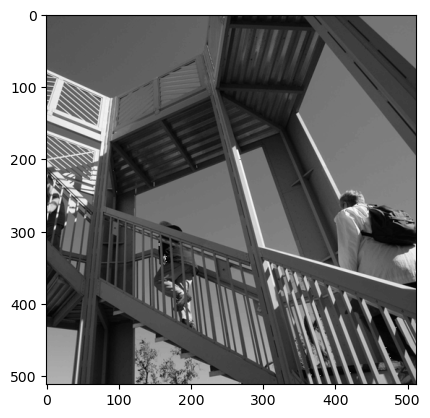

In [1]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
f = misc.ascent()  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

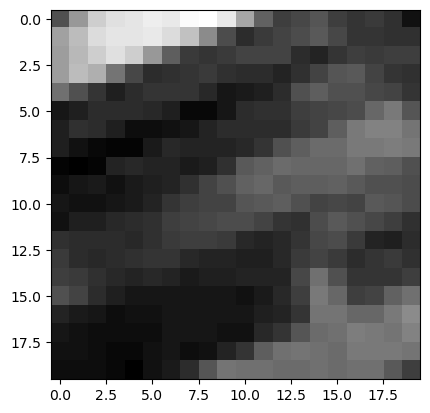

In [2]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest') 

In [3]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

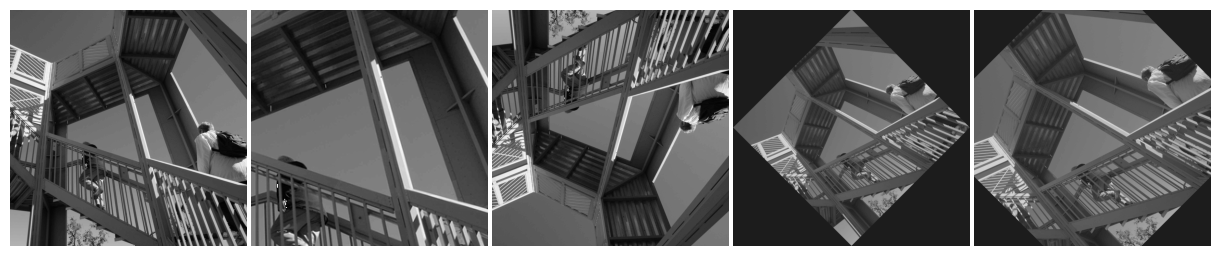

In [4]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

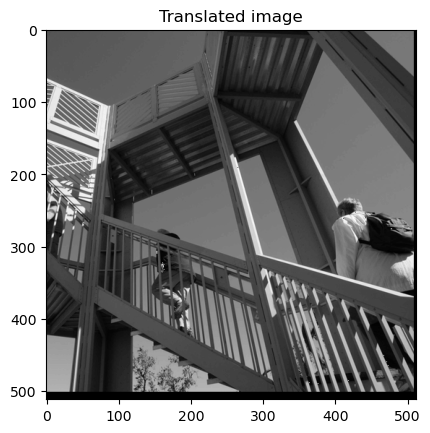

In [5]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

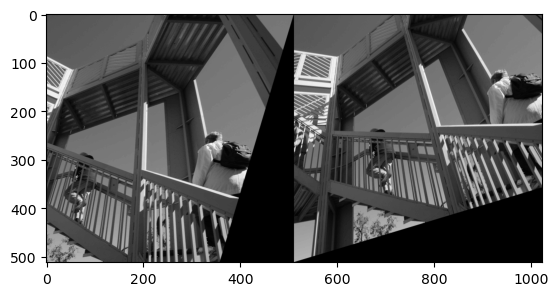

In [6]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [7]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x114d2cb50>

### Rescaling

In [8]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

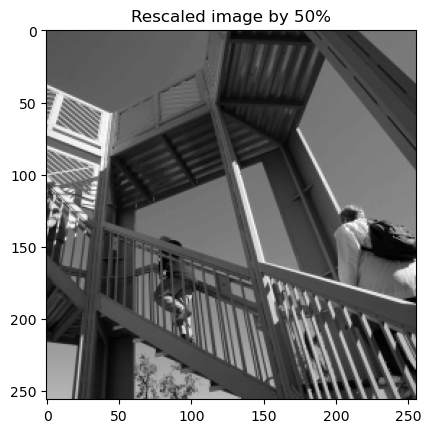

In [9]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing 

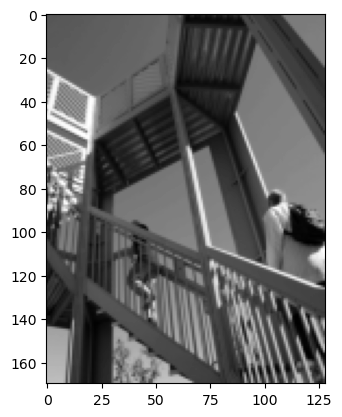

In [10]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [11]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate 

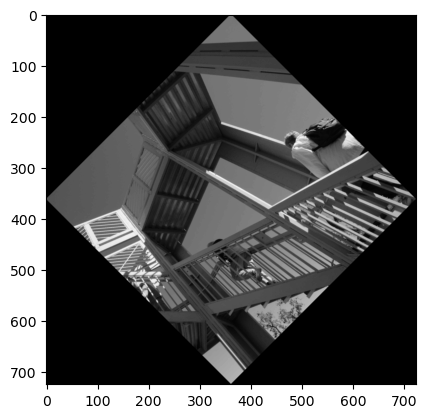

In [12]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


In [13]:
# Leave your answer here
#1. Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.

In [ ]:
from skimage import transform

# Load the 'ascent' image
f = sc.datasets.ascent()

# Horizontal shear by 0.2
shear_matrix = np.array([[1, 0.2, 0], [0, 1, 0], [0, 0, 1]])
shear_transform = transform.AffineTransform(matrix=shear_matrix)
sheared_f = transform.warp(f, shear_transform, preserve_range=True)

# Rescaling by 50%
rescaled_f = transform.rescale(sheared_f, 0.5, anti_aliasing=False)

# Display the result
plt.figure(figsize=(6, 6))
imshow(rescaled_f, cmap='gray')
plt.title("Horizontally Sheared and Rescaled Image")
plt.show()


In [ ]:
#2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.

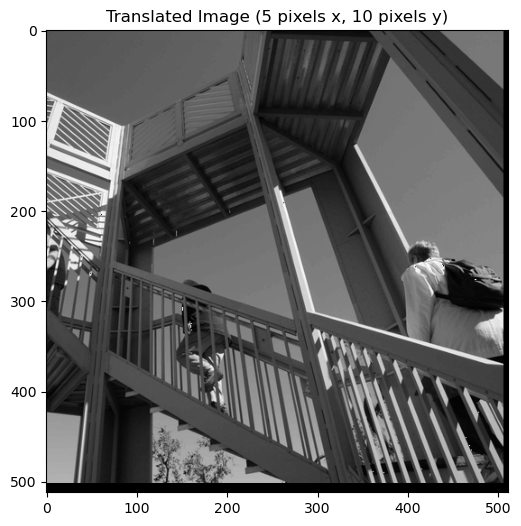

In [15]:
# Define the translation matrix
translation_matrix = np.array([[1, 0, 5], [0, 1, 10], [0, 0, 1]])

# Apply the affine transformation
translation_transform = transform.AffineTransform(matrix=translation_matrix)
translated_f = transform.warp(f, translation_transform, preserve_range=True)

# Display the translated image
plt.figure(figsize=(6, 6))
imshow(translated_f, cmap='gray')
plt.title("Translated Image (5 pixels x, 10 pixels y)")
plt.show()


In [ ]:
#3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.

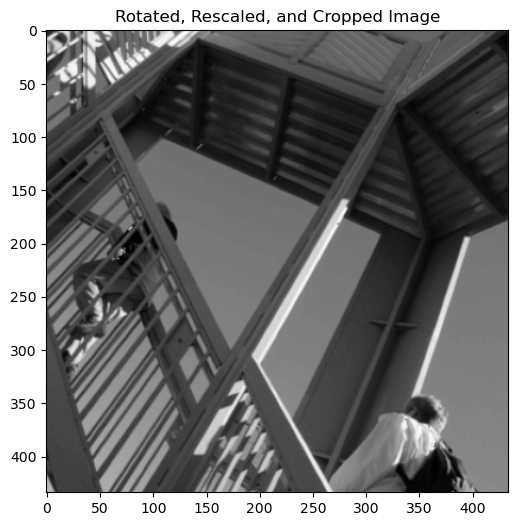

In [16]:
# Rotate the image by -45 degrees
rotated_f = transform.rotate(f, -45, resize=True)

# Rescale the rotated image by 1.2
rescaled_rotated_f = transform.rescale(rotated_f, 1.2, anti_aliasing=True)

# Crop to the central 50%
lx, ly = rescaled_rotated_f.shape
cropped_f = rescaled_rotated_f[lx // 4: -lx // 4, ly // 4: -ly // 4]

# Display the result
plt.figure(figsize=(6, 6))
imshow(cropped_f, cmap='gray')
plt.title("Rotated, Rescaled, and Cropped Image")
plt.show()


### Gamma correction and log contrast adjustment

In [14]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype=np.object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')


/var/folders/kj/bb_v10011nbcmpjq25wt_n5r0000gn/T/ipykernel_47432/781592483.py:9: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  axes=np.zeros((2,3), dtype=np.object)


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 900x600 with 0 Axes>

### Question 2: 
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.
2. How does logarithmic transformation improve the quality of an image?
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?


# Leave your answer here
1. Effect of Gamma-correction on the distribution of pixel intensities:

Gamma correction adjusts the brightness of an image by applying a non-linear transformation to the pixel values. If the gamma value is greater than 1 (e.g., gamma=2), the image becomes darker, compressing the pixel intensity values into the lower range, which makes darker areas even darker. When gamma is less than 1, the image becomes brighter as it shifts intensity values towards the upper range.

2. How does logarithmic transformation improve the quality of an image?

Logarithmic transformation enhances the contrast in an image by compressing the high-intensity values and expanding the low-intensity values. This is especially useful for images with large dynamic ranges, where details in the darker regions are often lost. The logarithmic adjustment can reveal details in these darker areas while maintaining an acceptable level of detail in brighter areas.

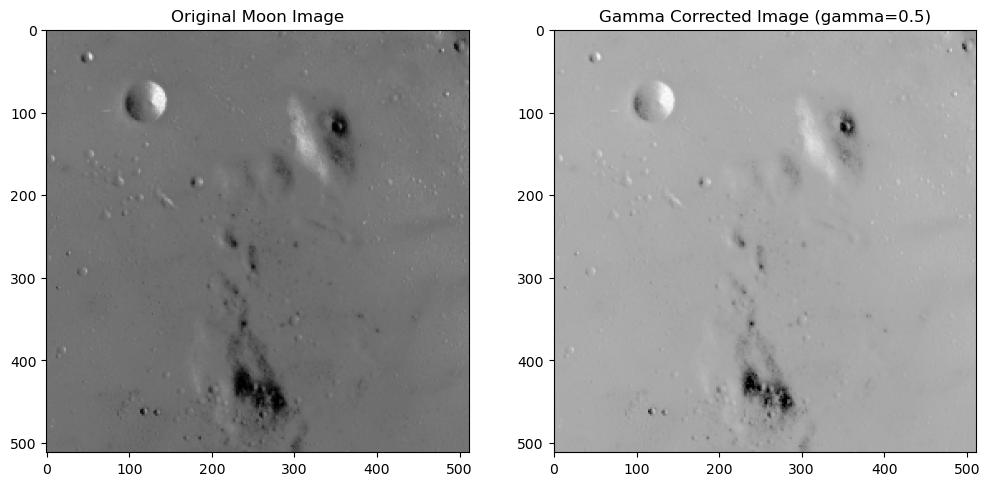

In [17]:
#3.
from skimage import exposure, data, img_as_float

# Load the moon image
moon_image = img_as_float(data.moon())

# Gamma transformation with gamma < 1 (e.g., 0.5)
gamma_corrected = exposure.adjust_gamma(moon_image, gamma=0.5)

# Display the original and gamma-corrected images
plt.figure(figsize=(12, 6))

plt.subplot(121)
imshow(moon_image, cmap='gray')
plt.title("Original Moon Image")

plt.subplot(122)
imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Corrected Image (gamma=0.5)")

plt.show()
